In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url_1 = "/work/data/covid_germany/covid.csv"
url_2= "/work/data/covid_germany/covid_vaccines.csv"
url_3 = "/work/data/covid_germany/demographics.csv"

df = pd.read_csv(url_1)
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df = df.dropna()
df_vaccine = pd.read_csv(url_2)
df_demographics = pd.read_csv(url_3)


In [ ]:
print(f'Germany population dataset: {df_demographics.groupby("state")["population"].sum().sum()}')
print()
print("COVID progress data:")
print(f'The inital date for this data-frame is {df.index.min()}, the latest date is {df.index.max()}, number of entries is {df.shape[0]}')
print()
print("COVID VACCINE data:")
print(f'The inital date for this data-frame is {df_vaccine.index.min()}, the latest date is {df_vaccine.index.max()}, number of entries is {df_vaccine.shape[0]}')

Germany population dataset: 83019213

COVID progress data:
The inital date for this data-frame is 2020-01-02 00:00:00, the latest date is 2021-08-04 00:00:00, number of entries is 889271

COVID VACCINE data:
The inital date for this data-frame is 0, the latest date is 220, number of entries is 221


## Fill na age_group with most frequent

In [ ]:
value_to_fill_na = df["age_group"].value_counts().index[0] 
df["age_group"] = df["age_group"].fillna(value_to_fill_na)

In [ ]:
idx_to_fill = df[df["gender"].isnull()].sample(frac=0.5).index
df.loc[idx_to_fill] = "M"
df["gender"] = df["gender"].fillna("F")

KeyboardInterrupt: 

In [ ]:
df_grouped = df.groupby("date").sum()
df_grouped.drop("M", inplace=True)

window = 10
df_grouped["cases"] = df_grouped["cases"].astype(float).rolling(window=window).mean()
df_grouped["deaths"] = df_grouped["deaths"].astype(float).rolling(window=window).mean()
df_grouped["recovered"] = df_grouped["recovered"].astype(float).rolling(window=window).mean()

<AxesSubplot:xlabel='date', ylabel='cases'>

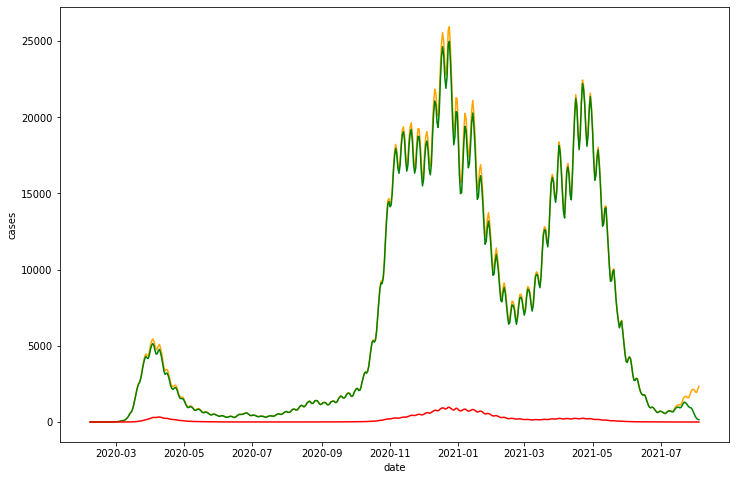

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_grouped,
            x=df_grouped.index,
            y="cases",
            color = "orange")
            
sns.lineplot(data=df_grouped,
            x=df_grouped.index,
            y="recovered",
            color =  "green")

sns.lineplot(data=df_grouped,
            x=df_grouped.index,
            y="deaths",
            color = "red")

<AxesSubplot:xlabel='gender', ylabel='count'>

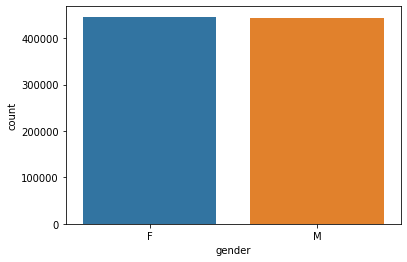

In [ ]:
sns.countplot(data=df,
              x= "gender")

In [ ]:
df_grouped = df.groupby("state")["deaths", "recovered", "cases"].sum()
df_grouped.sort_values(by= "cases", ascending=False,inplace= True)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='cases', ylabel='state'>

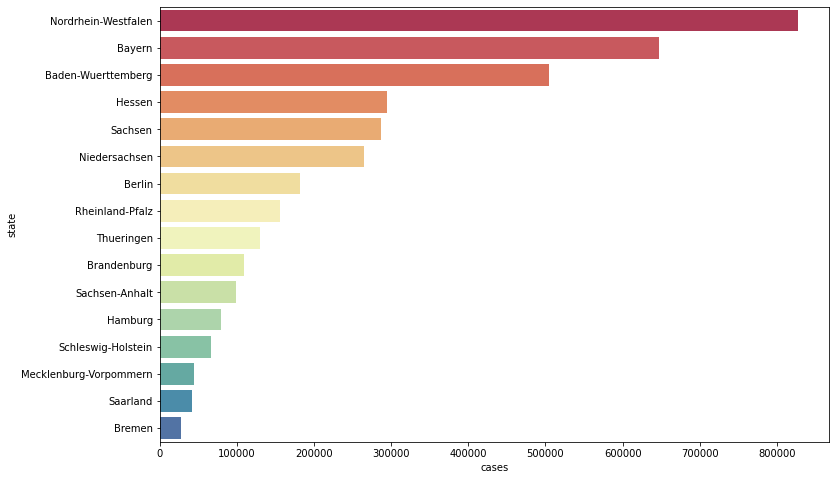

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_grouped,
            y = df_grouped.index,
            x="cases",
            palette= "Spectral")

In [ ]:
df_peak = df.loc["2020-12-15":"2021-01-15"]

df_grouped_peak = df_peak.groupby("state")["deaths", "recovered", "cases"].sum()
df_grouped_peak.sort_values(by= "cases", ascending=False,inplace= True)



last_month = df.index.max().month-1
last_day = df.index.max().day
this_year = df.index.max().year
df_last_month = df.loc[f"{this_year}-{last_month}-{last_day}": ]

df_grouped_last_month = df_last_month.groupby("state")["deaths", "recovered", "cases"].sum()
df_grouped_last_month.sort_values(by= "cases", ascending=False,inplace= True)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


<AxesSubplot:xlabel='cases', ylabel='state'>

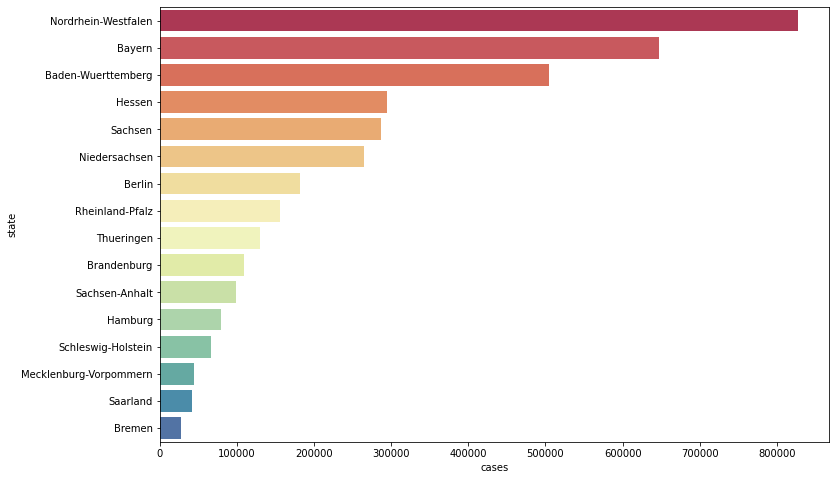

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_grouped_peak,
            y = df_grouped_peak.index,
            x="cases",
            palette= "Spectral")

sns.barplot(data=df_grouped_last_month,
            y = df_grouped_last_month.index,
            x="cases",
            palette= "Spectral")

<AxesSubplot:xlabel='cases', ylabel='state'>

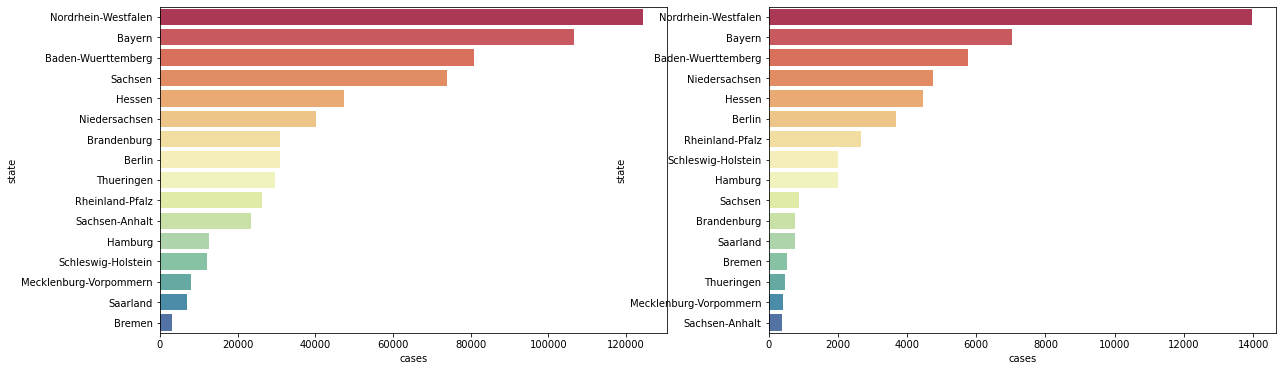

In [ ]:
fig, ax_arr  = plt.subplots(1,2, figsize=(20,6) )


sns.barplot(data=df_grouped_peak,
            y = df_grouped_peak.index,
            x="cases",
            ax= ax_arr[0],
            palette= "Spectral")

sns.barplot(data=df_grouped_last_month,
            y = df_grouped_last_month.index,
            x="cases",
            ax= ax_arr[1],
            palette= "Spectral")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>